**Objectif**
Le but fondamental de ce fichier est d'explorer la relation existente entre le taux de ch√¥mage (UNRATE) et les variables explicatives ou pr√©dicateures.

Il est primordial pour essayer d'orienter nos mod√®les. 

**D√©marches**
- Etude de corr√©lation entre UNRATE et les pr√©dicateurs quantitatifs
- Analyse de la relation entre UNRATE et USREC

**Conclusion**
- Un mod√®le multivari√© est utile car chaque variable √©conomique ne fournit qu‚Äôune partie de l‚Äôinformation. En combinant plusieurs indicateurs, on capte mieux la r√©alit√© √©conomique et on am√©liore la qualit√© de l‚Äôexplication du ch√¥mage. On s'attend alors que les mod√®les multivari√©s pr√©disent mieux le taux de ch√¥mage qu'un simple mod√®le auto-r√©gressive AR(). AR() est donc notre baseline. 

- On s'attend aussi que les mod√®les fond√©s sur des hypoth√®ses de lin√©arit√© comme la r√©gression lin√©aire performent moins. D'o√π l'int√©r√™t d'essayer des approches en Machine Learning plus tard. Notre hypoth√®se est qu'ils de capturer des interactions plus subtiles et d‚Äôaugmenter le potentiel pr√©dictif.

- Perspective : impl√©menter AR(), r√©gression lin√©aire et un mod√®le de machine learning.

# Packages

In [1]:
import pandas as pd
from matplotlib.pyplot import subplots
import seaborn as sns

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway

# Importer les donn√©es

In [2]:
df_stationary_train = pd.read_csv("df_stationary_train.csv", index_col="date")


# 1.Etude de corr√©lation entre le Target et les predicators

In [3]:
cols = df_stationary_train.columns.to_list()

C:\Users\Mita\AppData\Local\Temp\ipykernel_13720\2975085021.py:30: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


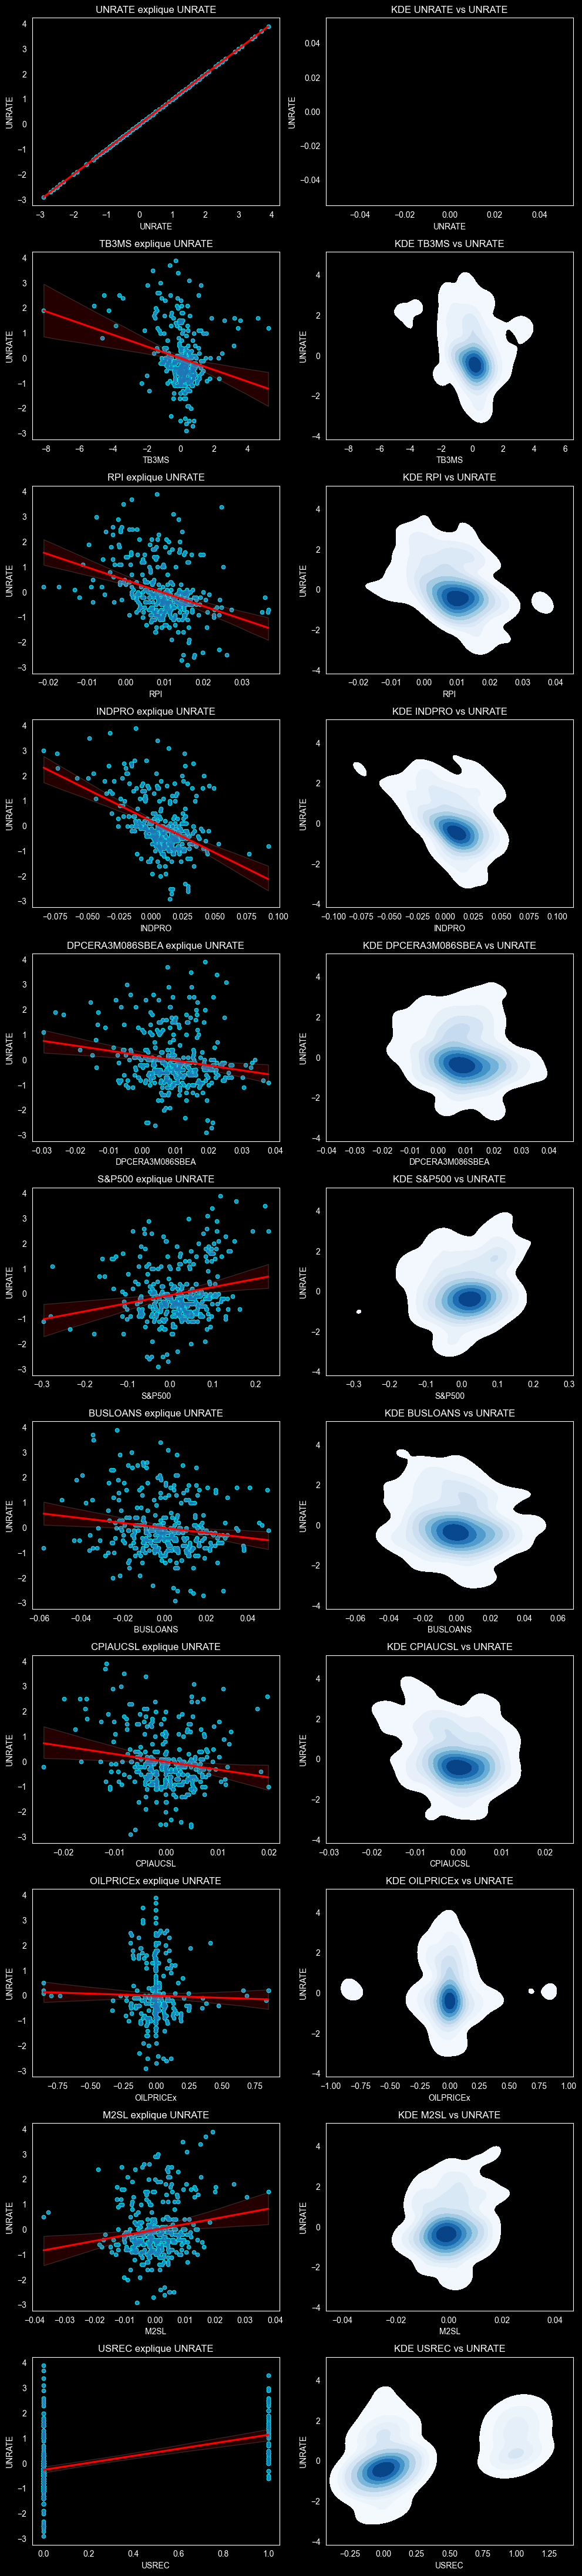

In [4]:
sns.set_style("dark")  # style sombre seaborn

fig, axes = plt.subplots(
    nrows=len(cols), ncols=2,
    figsize=(10, 4*len(cols)),
    facecolor="black"  # fond de la figure en noir
)

for ax_row, col in zip(axes, cols):
    ax_scatter, ax_kde = ax_row

    # Couleur de fond des axes en noir
    ax_scatter.set_facecolor("black")
    ax_kde.set_facecolor("black")

    # === SCATTER + REGRESSION ===
    df_stationary_train.plot.scatter(
        x=col, y="UNRATE", ax=ax_scatter, color="cyan"
    )
    sns.regplot(
        data=df_stationary_train, x=col, y="UNRATE",
        ax=ax_scatter, scatter_kws={'s':10}, line_kws={"color":"red"}
    )
    ax_scatter.set_title(f"{col} explique UNRATE", color="white")
    ax_scatter.tick_params(colors="white")
    ax_scatter.xaxis.label.set_color("white")
    ax_scatter.yaxis.label.set_color("white")

    # === KDE PLOT ===
    sns.kdeplot(
        data=df_stationary_train,
        x=col, y="UNRATE",
        fill=True,
        cmap="Blues",
        ax=ax_kde
    )
    ax_kde.set_title(f"KDE {col} vs UNRATE", color="white")
    ax_kde.tick_params(colors="white")
    ax_kde.xaxis.label.set_color("white")
    ax_kde.yaxis.label.set_color("white")

plt.tight_layout()
plt.show()

**R√®gles de lecture**
- Pente rouge ‚Üí corr√©lation lin√©aire directionnelle
- Dispersion des points ‚Üí force du signal vs bruit
- KDE en 2D ‚Üí structure du nuage : 
  - allong√© en diagonale ‚Üí lien r√©el
  - rond ‚Üí lien faible / nul
  - plusieurs ‚Äúblobs‚Äù ‚Üí r√©gimes diff√©rents

**Interpr√©tations**
1. Variables pro-cycliques (corr√©lation n√©gative) : TB3MS, RPI, INDPRO, DPCERA3M086SBEA, BUSLOANS

- Pente rouge : n√©gative ‚Üí plus d‚Äôactivit√©, moins de ch√¥mage.
- Dispersion : forte ‚Üí signal r√©el mais bruit√©.
- KDE : l√©g√®rement allong√© ‚Üí relation lin√©aire faible mais pr√©sente.

‚Üí Ces indicateurs suivent le cycle : quand ils montent, UNRATE baisse.

2. Variables sans lien clair ou un impact positif : CPIAUCSL, OILPRICEx, S&P500, M2SL
- KDE : rond ‚Üí absence de structure directionnelle.
‚Üí Relations instables ou nulles

# 2.Test de corr√©lation

In [5]:
from scipy.stats import pearsonr, spearmanr
import pandas as pd

results = []

for col in cols:
    r_pearson, p_pearson = pearsonr(df_stationary_train[col], df_stationary_train["UNRATE"])
    r_spear, p_spear = spearmanr(df_stationary_train[col], df_stationary_train["UNRATE"])

    results.append({
        "Variable": col,
        "Pearson_r": r_pearson,
        "Pearson_pvalue": p_pearson,
        "Spearman_rho": r_spear,
        "Spearman_pvalue": p_spear
    })

df_corr_tests = pd.DataFrame(results)
df_corr_tests["Significatif (p<0.05)"] = df_corr_tests["Pearson_pvalue"] < 0.05
df_corr_tests

Variable  Pearson_r  Pearson_pvalue  Spearman_rho  Spearman_pvalue  \
0            UNRATE   1.000000    0.000000e+00      1.000000     0.000000e+00   
1             TB3MS  -0.238865    4.728572e-06     -0.249874     1.633372e-06   
2               RPI  -0.352819    5.807669e-12     -0.369646     4.577510e-13   
3            INDPRO  -0.445966    6.035676e-19     -0.396655     5.624164e-15   
4   DPCERA3M086SBEA  -0.168558    1.348096e-03     -0.167706     1.427164e-03   
5            S&P500   0.205471    8.801234e-05      0.153077     3.644124e-03   
6          BUSLOANS  -0.148235    4.886503e-03     -0.122131     2.063192e-02   
7          CPIAUCSL  -0.167027    1.493134e-03     -0.136348     9.695711e-03   
8         OILPRICEx  -0.024580    6.425212e-01     -0.032332     5.414516e-01   
9              M2SL   0.160580    2.274929e-03      0.119167     2.394123e-02   
10            USREC   0.475834    1.101997e-21      0.494970     1.383789e-23   

    Significatif (p<0.05)  
0                    True  
1                    True  
2                    True  
3                    True  
4                    True  
5                    True  
6                    True  
7                    True  
8                   False  
9                    True  
10                   True

- Il existe une corr√©lation lin√©aire entre le taux ch√¥mage et les pr√©dicateurs. Le prix du p√©trol n'y est pas exceptionnellement. Ces corr√©lations sont toutes inf√©rieures √† 0.5, donc assez faible. 

- La variable USREC est celle qui est le plus corr√©l√©e au taux de ch√¥√πage : corr√©lation positive et forte ‚Üí signal conjoncturel clair (r√©cessions).

- INDPRO et RPI ont des corr√©lations n√©gatives assez fortes : quand l‚Äôactivit√© r√©elle se contracte, ton indicateur varie en sens inverse.

## 3. Relation entre UNRATE ET USREC

<Axes: title={'center': 'UNRATE'}, xlabel='USREC'>

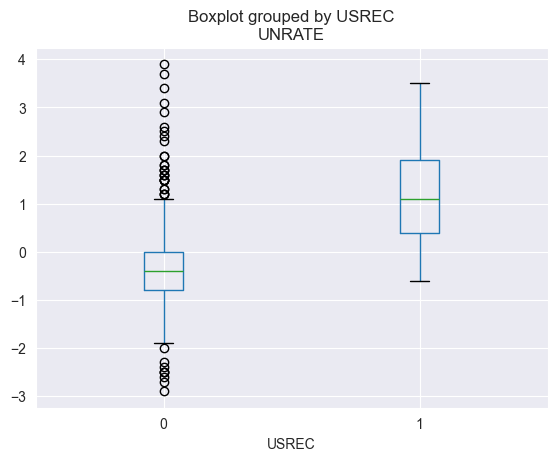

In [6]:
df_stationary_train.boxplot("UNRATE", by = "USREC")

In [7]:
group0 = df_stationary_train[df_stationary_train["USREC"] == 0]["UNRATE"]
group1 = df_stationary_train[df_stationary_train["USREC"] == 1]["UNRATE"]

anova = f_oneway(group0, group1)
stat, pvalue = anova.statistic, anova.pvalue

print(f"F = {stat:.4f}, p-value = {pvalue:.4f}")

# D√©cision
alpha = 0.05
if pvalue < alpha:
    print("üëâ D√©cision : on rejette H0 ‚Äî les moyennes sont significativement diff√©rentes.")
else:
    print("üëâ D√©cision : on ne rejette pas H0 ‚Äî pas de diff√©rence significative entre les moyennes.")

F = 104.4896, p-value = 0.0000
üëâ D√©cision : on rejette H0 ‚Äî les moyennes sont significativement diff√©rentes.


On constate que les taux de croissance ch√¥mage durant la p√©riode de r√©cession sont nettement diff√©rentes que durant le temps normal. En effet, le taux de croissance du ch√¥mage est majoritairement plus de 1% en temps de r√©cession. En temps normal, sa m√©diane est moins de 0%.